# Tennis Ace

## Introduction

This project analyzes data from the Association of Tennis Professionals (ATP), spanning from 2009 to 2017, to determine what it takes to be one of the best tennis players in the world. The goal of this project is to predict, using a Multiple Linear Regression model, the outcome for a tennis player based on their playing habits.

#### Data sources:

The csv file analyzed was provided by Codecademy.

## Scoping

- Describe the characteristics of the data
    
- Data Cleaning

- Exploratory Analysis/Data Visualization

- Model Training, Evaluation & Prediction 

## Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<br>

## Load and Inspect Data 

The tennis_stats.csv file contain service game (offensive) statistics, return game (defensive) statistics, and outcomes for 438 unique players from 2009 - 2017. The tennis_stats.csv file is loaded into `tennis_players_stats`. `tennis_players_stats` has 1,721 non-null rows and 24 columns.


### Data Characteristics:

The service game columns include:
- **Aces:** number of legal serves by the player where the ball is not touched by the receiver
- **DoubleFaults:** number of times a player makes a mistake with both first and second attempts
- **FirstServe:** proportion of first serve attempts 
- **FirstServePointsWon:** proportion of first serve attempt won by a player
- **SecondServePointsWon:** proportion of second serve attempt won by a player
- **BreakPointsFaced:** number of times there was an opportunity for the player serving to lose and for the receiver to win the service game
- **BreakPointsSaved:** proportion of the time the player serving was able to stop the receiver from winning service game when they had the chance
- **ServiceGamesPlayed:** number of games where the player served
- **ServiceGamesWon:** number of games where the player served  and won
- **TotalServicePointsWon:** proportion of points in games where a player won when it is their service game 

The return game columns include:
- **FirstServeReturnPointsWon:** proportion of opponent’s first serve points the player was able to win
- **SecondServeReturnPointsWon:** proportion of opponent’s second serve points the player was able to win
- **BreakPointsOpportunities:** number of times there was an opportunity for the player to win the opponent’s service game
- **BreakPointsConverted:** proportion of the time there was an opportunity for the player to win the opponent’s service game and they won
- **ReturnGamesPlayed:** number of games where the player’s opponent served
- **ReturnGamesWon:** number of games where the player’s opponent served and the player won 
- **ReturnPointsWon:** number of points where the player’s opponent served and the player won 
- **TotalPointsWon:** proportion of points won by the player


The outcome columns include:
- **Wins:** number of matches won in a year
- **Losses:** number of matches lost in a year
- **Winnings:** total winnings in USD in a year
- **Ranking:** ranking at the end of year

There are duplicates of 2015's record of players 'Facundo Bagnis' and 'Andrea Arnaboldi'.

In [2]:
tennis_players_stats = pd.read_csv('tennis_stats.csv')
tennis_players_stats.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
tennis_players_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [4]:
tennis_players_stats['Player'].nunique()

438

In [5]:
tennis_players_stats[tennis_players_stats.duplicated()]

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
938,Facundo Bagnis,2015,0.59,0.64,0.30,0.52,0.45,20,0.43,43,...,0.16,0.35,63,0.68,0.47,0.59,2,4,123931,223
1317,Andrea Arnaboldi,2015,0.57,0.68,0.22,0.50,0.46,23,0.30,52,...,0.13,0.32,64,0.73,0.47,0.60,1,3,154062,222


In [6]:
tennis_players_stats.loc[tennis_players_stats['Player'] == 'Facundo Bagnis']

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
273,Facundo Bagnis,2012,0.65,0.69,0.23,0.54,0.51,12,0.25,23,...,0.18,0.35,33,0.73,0.49,0.64,1,2,46526,223
512,Facundo Bagnis,2014,0.62,0.68,0.27,0.47,0.41,29,0.44,62,...,0.17,0.33,90,0.73,0.47,0.60,2,3,143989,223
514,Facundo Bagnis,2017,0.62,0.69,0.26,0.46,0.45,87,0.34,130,...,0.13,0.33,191,0.74,0.47,0.60,3,12,224746,223
825,Facundo Bagnis,2016,0.60,0.65,0.30,0.48,0.50,53,0.36,128,...,0.22,0.38,180,0.70,0.48,0.58,6,11,287122,223
935,Facundo Bagnis,2015,0.59,0.64,0.30,0.52,0.45,20,0.43,43,...,0.16,0.35,63,0.68,0.47,0.59,2,4,123931,223
938,Facundo Bagnis,2015,0.59,0.64,0.30,0.52,0.45,20,0.43,43,...,0.16,0.35,63,0.68,0.47,0.59,2,4,123931,223
1684,Facundo Bagnis,2011,0.48,0.68,0.28,0.47,0.47,4,0.25,14,...,0.14,0.35,21,0.67,0.45,0.57,0,2,47529,223


In [7]:
tennis_players_stats.loc[tennis_players_stats['Player'] == 'Andrea Arnaboldi']

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
67,Andrea Arnaboldi,2014,0.69,0.61,0.31,0.50,0.42,7,0.17,10,...,0.07,0.34,14,0.64,0.45,0.58,0,1,95708,222
1315,Andrea Arnaboldi,2015,0.57,0.68,0.22,0.50,0.46,23,0.30,52,...,0.13,0.32,64,0.73,0.47,0.60,1,3,154062,222
1317,Andrea Arnaboldi,2015,0.57,0.68,0.22,0.50,0.46,23,0.30,52,...,0.13,0.32,64,0.73,0.47,0.60,1,3,154062,222
1519,Andrea Arnaboldi,2016,0.54,0.64,0.35,0.48,0.48,13,0.34,47,...,0.27,0.40,58,0.66,0.49,0.56,2,3,89983,222


<br>

## Data Cleaning

Duplicates:
- Drop duplicates
- There are now 1,719 rows and 24 columns in `tennis_players_stats`

In [8]:
tennis_players_stats = tennis_players_stats.drop_duplicates()
tennis_players_stats.reset_index(inplace=True, drop=True)

In [9]:
tennis_players_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1719 entries, 0 to 1718
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1719 non-null   object 
 1   Year                        1719 non-null   int64  
 2   FirstServe                  1719 non-null   float64
 3   FirstServePointsWon         1719 non-null   float64
 4   FirstServeReturnPointsWon   1719 non-null   float64
 5   SecondServePointsWon        1719 non-null   float64
 6   SecondServeReturnPointsWon  1719 non-null   float64
 7   Aces                        1719 non-null   int64  
 8   BreakPointsConverted        1719 non-null   float64
 9   BreakPointsFaced            1719 non-null   int64  
 10  BreakPointsOpportunities    1719 non-null   int64  
 11  BreakPointsSaved            1719 non-null   float64
 12  DoubleFaults                1719 non-null   int64  
 13  ReturnGamesPlayed           1719 

<br>

##  Exploratory Analysis/Data Visualization

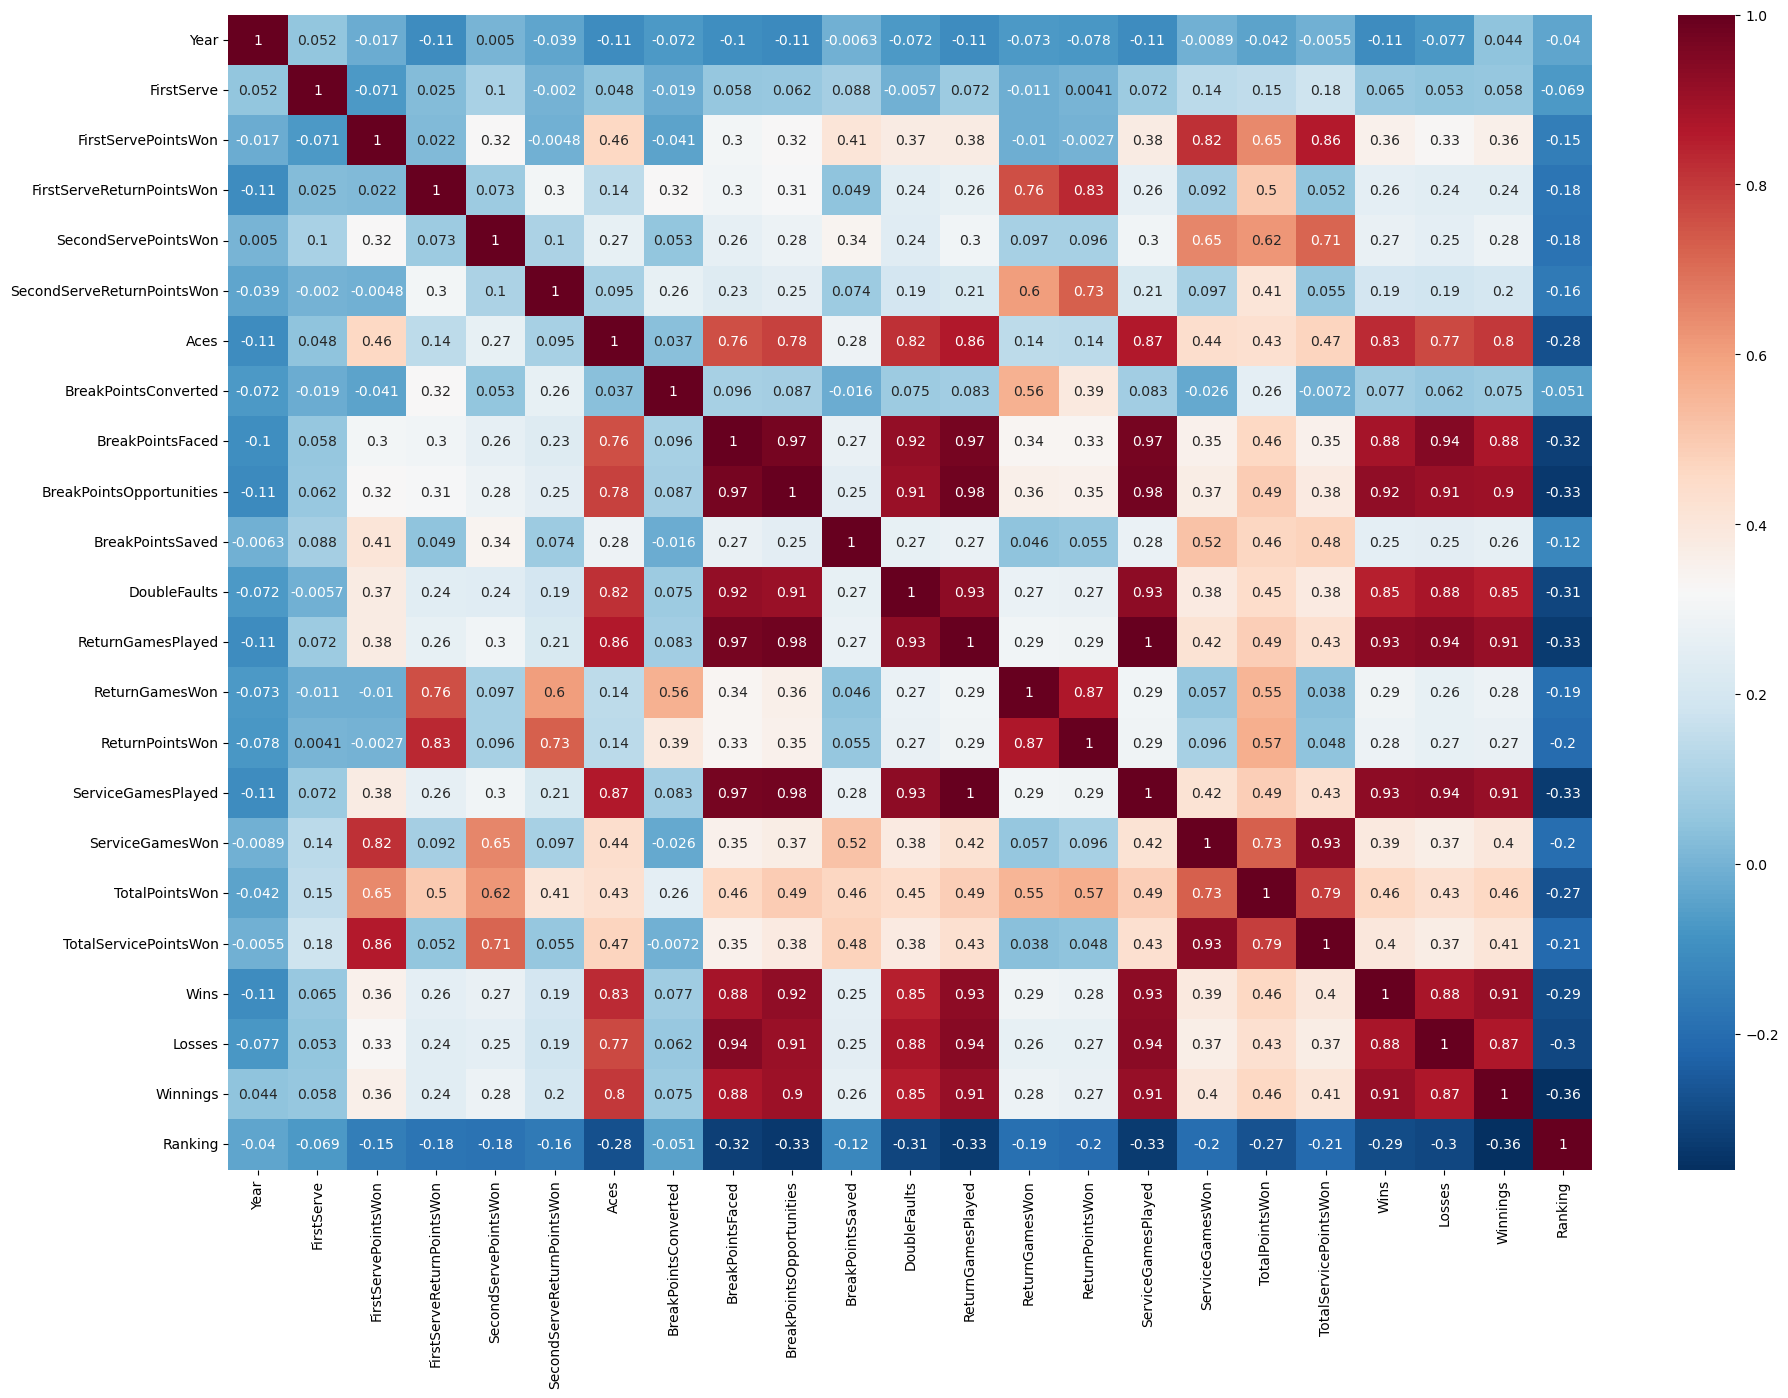

<Figure size 640x480 with 0 Axes>

In [10]:
corr_matrix = tennis_players_stats.corr(method='pearson')
plt.figure(figsize = (22,15))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r')
plt.show()
plt.clf()

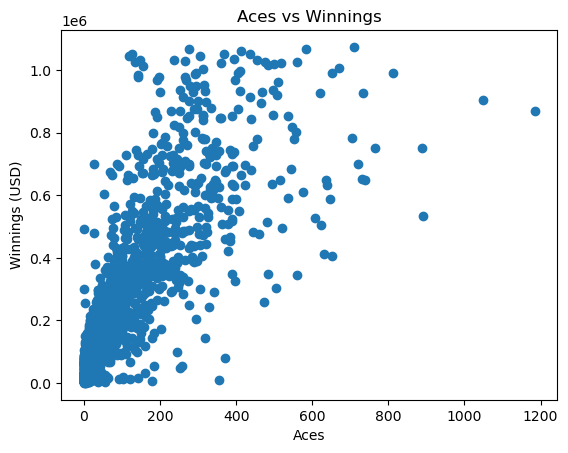

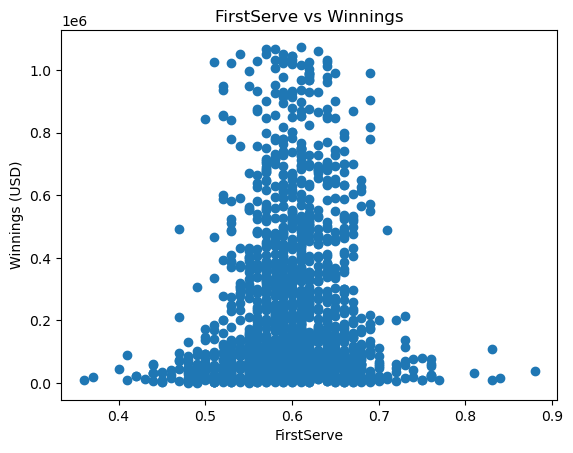

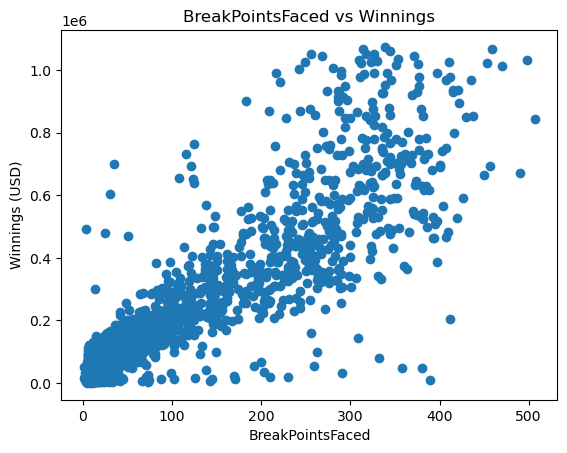

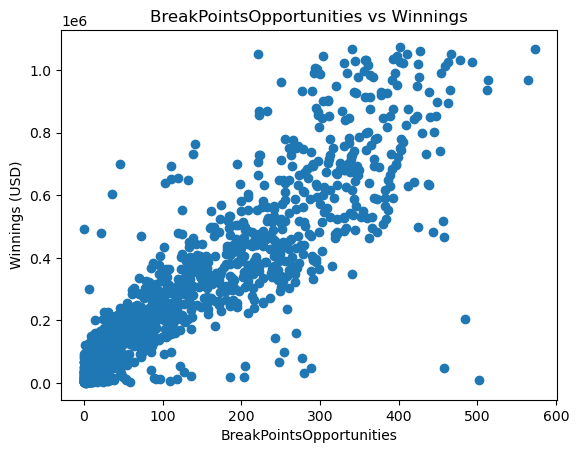

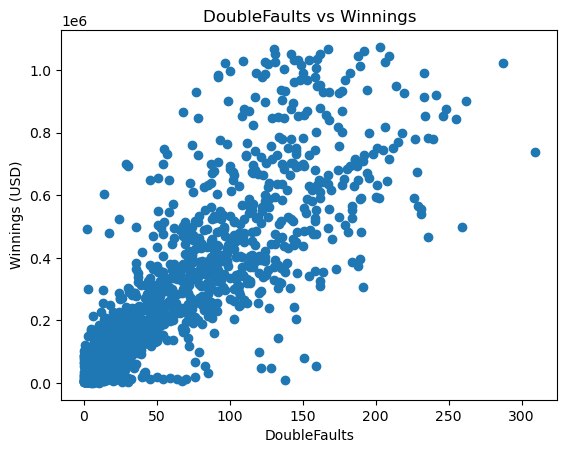

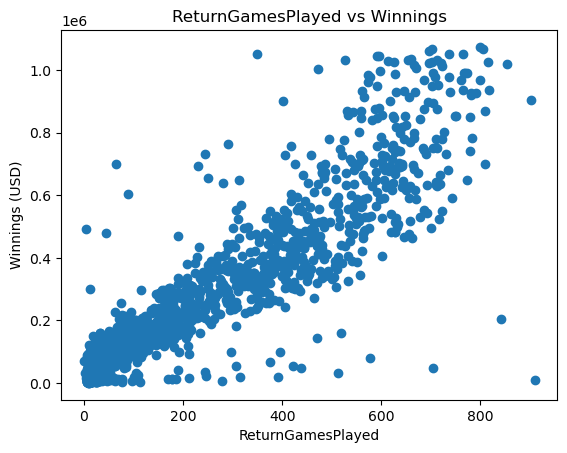

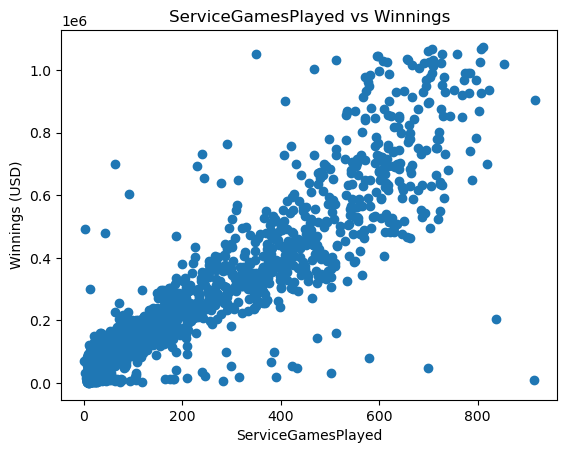

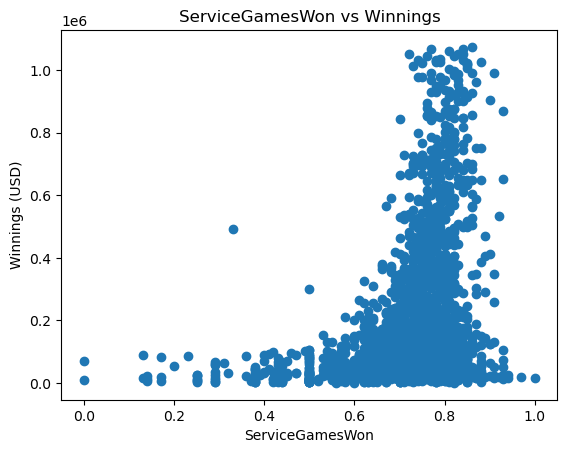

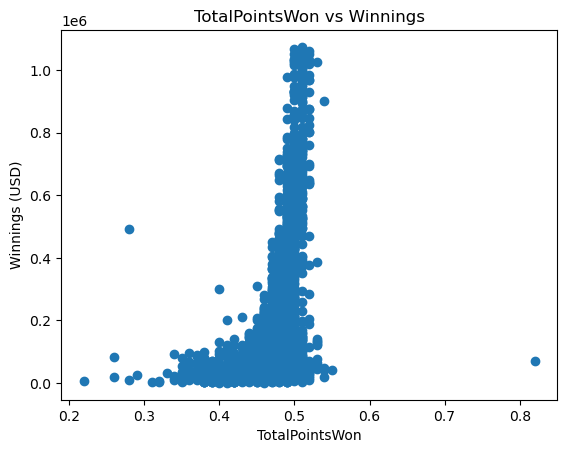

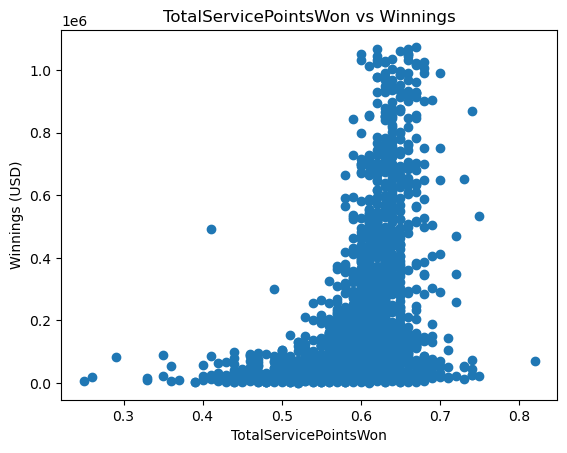

<Figure size 640x480 with 0 Axes>

In [11]:
plt.scatter(tennis_players_stats['Aces'],tennis_players_stats['Winnings'])
plt.title('Aces vs Winnings')
plt.xlabel('Aces')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['FirstServe'],tennis_players_stats['Winnings'])
plt.title('FirstServe vs Winnings')
plt.xlabel('FirstServe')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['BreakPointsFaced'],tennis_players_stats['Winnings'])
plt.title('BreakPointsFaced vs Winnings')
plt.xlabel('BreakPointsFaced')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf() 

plt.scatter(tennis_players_stats['BreakPointsOpportunities'],tennis_players_stats['Winnings'])
plt.title('BreakPointsOpportunities vs Winnings')
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['DoubleFaults'],tennis_players_stats['Winnings'])
plt.title('DoubleFaults vs Winnings')
plt.xlabel('DoubleFaults')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['ReturnGamesPlayed'],tennis_players_stats['Winnings'])
plt.title('ReturnGamesPlayed vs Winnings')
plt.xlabel('ReturnGamesPlayed')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['ServiceGamesPlayed'],tennis_players_stats['Winnings'])
plt.title('ServiceGamesPlayed vs Winnings')
plt.xlabel('ServiceGamesPlayed')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['ServiceGamesWon'],tennis_players_stats['Winnings'])
plt.title('ServiceGamesWon vs Winnings')
plt.xlabel('ServiceGamesWon')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['TotalPointsWon'],tennis_players_stats['Winnings'])
plt.title('TotalPointsWon vs Winnings')
plt.xlabel('TotalPointsWon')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

plt.scatter(tennis_players_stats['TotalServicePointsWon'],tennis_players_stats['Winnings'])
plt.title('TotalServicePointsWon vs Winnings')
plt.xlabel('TotalServicePointsWon')
plt.ylabel('Winnings (USD)')
plt.show()
plt.clf()

<br>

## Modeling

### Data Selection

Selecting 'Aces' , 'ServiceGamesPlayed', and 'ReturnGamesPlayed' for Single-Feature Linear Regression modeling

In [12]:
feature = tennis_players_stats['Aces']
winnings = tennis_players_stats['Winnings']

### Split the Data into Training and Testing Sets

In [13]:
feature_train, feature_test, winnings_train, winnings_test = train_test_split(feature, winnings, train_size = 0.8, random_state = 1)

### Standardize Data

In [14]:
#first, reshape data
feature_train = np.array(feature_train).reshape(-1,1)
feature_test = np.array(feature_test).reshape(-1,1)

scaler = StandardScaler()

# fit and transform data
feature_train = scaler.fit_transform(feature_train)
feature_test = scaler.transform(feature_test)

### Create and Train the Model

In [15]:
model = LinearRegression()
model.fit(feature_train, winnings_train)

LinearRegression()

### Evaluate the Model

Using the `.score()` method, the coefficient of determination showed that about sixty percent of the variation in `Winnings` is explained by the variation in the 'Aces' feature

In [16]:
print('Training Score:')
model.score(feature_train, winnings_train)

Training Score:


0.6399152133292716

In [17]:
print('Test Score:')
model.score(feature_test, winnings_test)

Test Score:


0.6239275357651282

In [18]:
#print the model feature and its corresponding coefficient
print('Feature Coefficients:')
sorted(list(zip(['Aces'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

Feature Coefficients:


[('Aces', 199022.76480610832)]

<br>

**To replicate the model building, evaluation & prediction process more easily, a function called `model_these_features()` is created below.**

First, let us define different subsets of data:

In [19]:
#subset of single features
ServiceGamesPlayed = ['ServiceGamesPlayed']
BreakPointsOpportunities = ['BreakPointsOpportunities']
ReturnGamesPlayed = ['ReturnGamesPlayed']

#subset of two features
BPF_SGP = ['BreakPointsFaced', 'ServiceGamesPlayed']
BP0_RGP = ['BreakPointsOpportunities', 'ReturnGamesPlayed']

#subset of selected (multi) features
selected_features = ['BreakPointsOpportunities', 'DoubleFaults', 'ServiceGamesPlayed']

#subset of all features excluding 'Player', 'Year', and the outcome columns
all_features = ['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon', 'BreakPointsFaced', 'BreakPointsSaved', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalServicePointsWon', 'FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsOpportunities', 'BreakPointsConverted','ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'TotalPointsWon']

<br>

## More Modeling

Let's create our function!

In [20]:
# take a list of features to model as a parameter
def model_these_features(feature_list):
    
    #Define ratings and features
    feature = tennis_players_stats.loc[:, feature_list]
    winnings = tennis_players_stats.loc[:,'Winnings']
    
    #Split Data into training and test sets
    feature_train, feature_test, winnings_train, winnings_test = train_test_split(feature, winnings, train_size = 0.8, random_state = 1)
    
    #Allow the model to work when we model on just one feature instead of multiple features
    if len(feature_train.shape) < 2:
        feature_train = np.array(feature_train).reshape(-1,1)
        feature_test = np.array(feature_test).reshape(-1,1)
    
    #standardize data
    scaler = StandardScaler()
    feature_train = scaler.fit_transform(feature_train)
    feature_test = scaler.transform(feature_test)
    
    #Create and train the model
    model = LinearRegression()
    model.fit(feature_train, winnings_train)
    
    #print training and test scores
    print('Train Score:', model.score(feature_train, winnings_train))
    print('Test Score:', model.score(feature_test, winnings_test))
    
    # print the model features and their corresponding coefficients, from most predictive to least predictive
    print(sorted(list(zip(feature_list, model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
    #calculate the predicted winnings for our testing data 
    winnings_predicted = model.predict(feature_test)
    
    #Visualize Predicted winnings vs actual winnings!
    plt.scatter(winnings_test, winnings_predicted)
    plt.xlabel('Actual Winnings')
    plt.ylabel('Predicted Winnings')
    plt.show()

### Single-Feature Linear Regression

Train Score: 0.8326635980483135
Test Score: 0.8353205623974465
[('ServiceGamesPlayed', 227026.38140010438)]


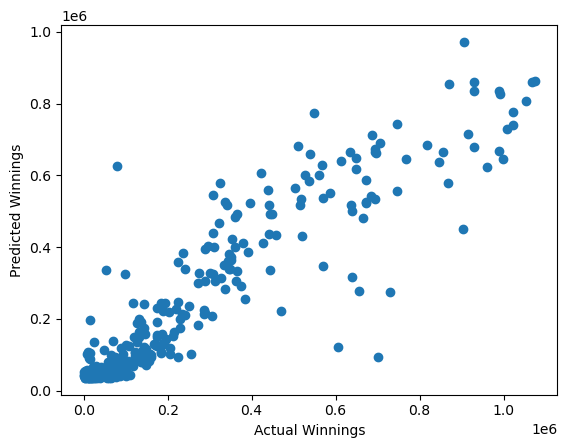

In [21]:
# create a model on ServiceGamesPlayed 
model_these_features(ServiceGamesPlayed)

Train Score: 0.8323997971919534
Test Score: 0.8331640843814195
[('ReturnGamesPlayed', 226990.41579633357)]


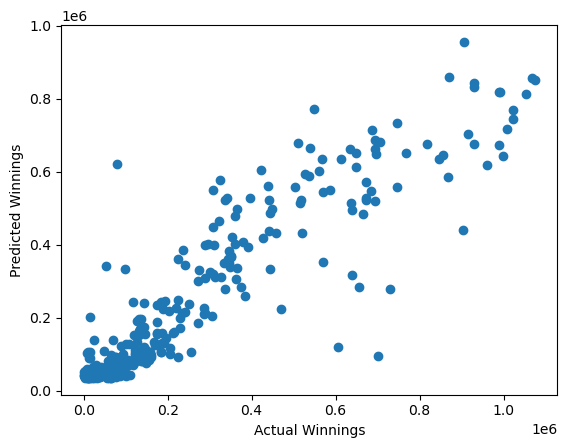

In [22]:
# create a model on ReturnGamesPlayed 
model_these_features(ReturnGamesPlayed)

### Two-Feature Linear Regression

Train Score: 0.833197069147427
Test Score: 0.8406945850213382
[('ServiceGamesPlayed', 251882.62404284245), ('BreakPointsFaced', -25511.84202410967)]


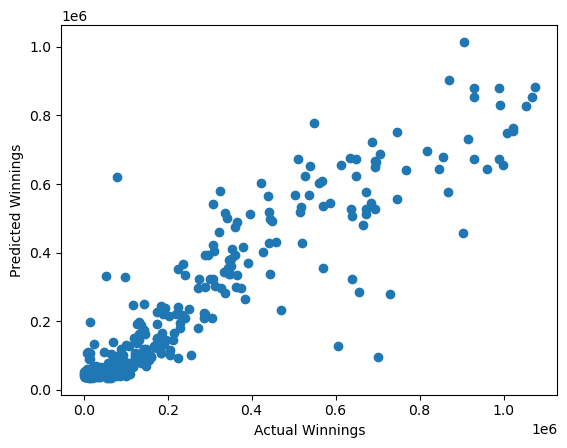

In [23]:
# create a model on 'BreakPointsFaced', 'ServiceGamesPlayed' 
model_these_features(BPF_SGP)

Train Score: 0.8339870642621026
Test Score: 0.8325794040432575
[('ReturnGamesPlayed', 177145.718379131), ('BreakPointsOpportunities', 50820.70423347311)]


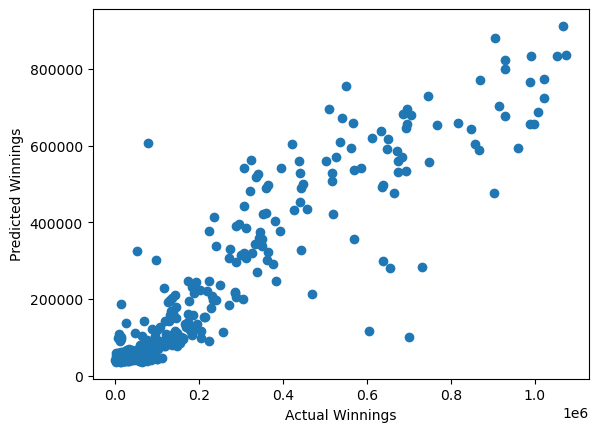

In [24]:
# create a model on 'BreakPointsOpportunities', 'ReturnGamesPlayed'
model_these_features(BP0_RGP)

### Multi-Feature Linear Regression

Train Score: 0.8363398946178229
Test Score: 0.8281387017030484
[('ServiceGamesPlayed', 147345.64362409464), ('BreakPointsOpportunities', 52844.054689306), ('DoubleFaults', 30018.070597869213)]


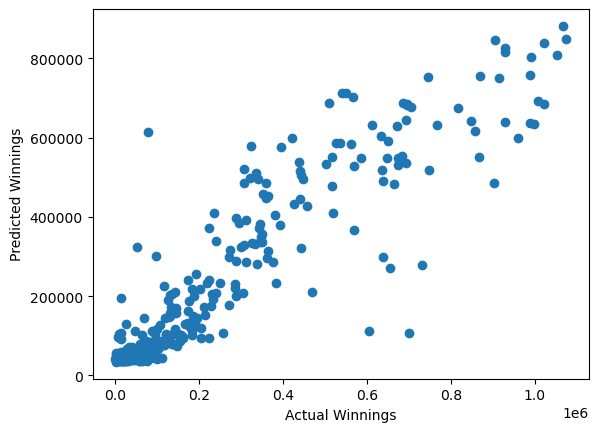

In [25]:
# create a model on selected (multi) features 
model_these_features(selected_features)

Train Score: 0.8401355607711363
Test Score: 0.8413525683916412
[('ServiceGamesPlayed', 150774.87961599196), ('BreakPointsOpportunities', 80791.0699497744), ('BreakPointsFaced', -78864.60971985754), ('ReturnGamesPlayed', 44924.84964724602), ('DoubleFaults', 40350.92684870295), ('FirstServePointsWon', 15379.219432212927), ('TotalPointsWon', -15262.41652136633), ('Aces', -11090.686611187242), ('SecondServePointsWon', 9581.926138584698), ('ReturnGamesWon', 6305.098213904434), ('BreakPointsSaved', 6025.205281551092), ('ServiceGamesWon', -5593.142778500915), ('TotalServicePointsWon', -3684.131652457083), ('FirstServe', 2456.969673813779), ('SecondServeReturnPointsWon', 2449.1028529409614), ('FirstServeReturnPointsWon', -1669.7666970767987), ('ReturnPointsWon', 403.02076283462884), ('BreakPointsConverted', -249.82352010594695)]


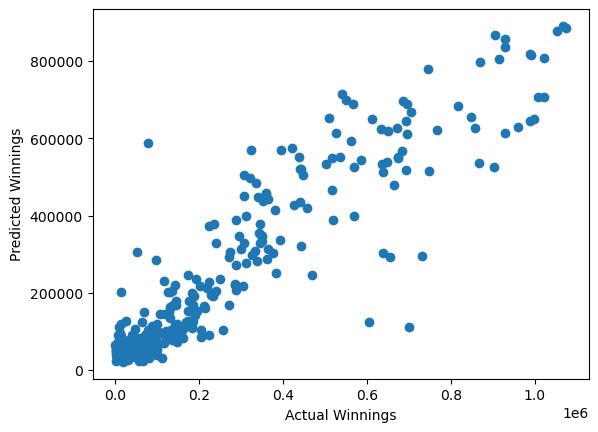

In [26]:
# create a model on all features 
model_these_features(all_features)

**The best model was the model using all features: a Train and Test score of ~0.84**

In [27]:
feature = tennis_players_stats.loc[:, all_features]
winnings = tennis_players_stats.loc[:, 'Winnings']
feature_train, feature_test, winnings_train, winnings_test = train_test_split(feature, winnings, train_size = 0.8, random_state = 1)
model = LinearRegression()
model.fit(feature_train, winnings_train)

LinearRegression()

In [28]:
winnings_pred_test = model.predict(feature_test)
winnings_pred_train = model.predict(feature_train)

print('R^2: %.2f' % r2_score(winnings_test, winnings_pred_test))
print('MSE: %.2f' % mean_squared_error(winnings_test, winnings_pred_test, squared=False))

R^2: 0.84
MSE: 107384.66


**The coefficient of determination showed that about eighty-four percent of the variation in `Winnings` is explained by the variation in the independent features included in the  `all_feature` list**